In [1]:
import numpy as np
from behaviour import RegionalBehaviourModel
import covasim as cv

fname = '/home/andrew/dev/wble_proj/behaviour_module/tests/mr_pop.pop'

# Generate population
params_ca = dict(name = 'city_a', n=20000, com_contacts=20) # large city
params_cb = dict(name = 'city_b', n=10000, com_contacts=10) # medium city
params_cc = dict(name = 'city_c', n=5000,  com_contacts=10) # small city
pop_mod = RegionalBehaviourModel(None, None, *(params_ca, params_cb, params_cc))
# pop_mod.save(fname)

Covasim 3.1.2 (2022-01-16) — © 2020-2022 by IDM
Community mixing parameters not given; initializing defaults...
BEHAVIOUR_MODULE
BEHAVIOUR_MODULE
BEHAVIOUR_MODULE


In [2]:
# Run the simulation. 

# pop_mod = RegionalBehaviourModel.load(fname)
# Set defaults
pop_size = 35000
pop_type = 'behaviour_module'
n_days = 200

# Create parameter dictionary 
pars = dict(
    pop_size = pop_size,
    pop_type = pop_type, 
    n_days = n_days,
    rand_seed = 1)

sim = cv.Sim(pars=pars, people=pop_mod.total_popdict, multireg_pars = pop_mod.reg_pars)
sim.run(verbose=False)

Initializing sim with 35000 people for 200 days


Sim(<no label>; 2020-03-01 to 2020-09-17; pop: 35000 behaviour_module; epi: 34804⚙, 149☠)

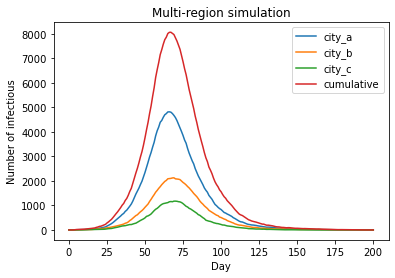

In [3]:
import matplotlib.pyplot as plt

# Plotting. 
rnames = sim.rnames
rsizes = sim.rsizes

x_axis = np.arange(0, sim.t+1)

for rname in rnames:
    plt.plot(x_axis, sim.results[f"{rname}_n_infectious"])

plt.figsize=(6, 3)
plt.plot(x_axis, sim.results["n_infectious"]) # cumulative
    
plt.xlabel("Day")
plt.ylabel("Number of infectious")
plt.title("Multi-region simulation")
plt.legend(rnames + ["cumulative"])
# plt.show()

fig_path = "/home/andrew/dev/wble_proj/behaviour_module/analysis/2wksum_0701/"
fname = "mr_sim.png"
plt.savefig(fig_path+fname, dpi=150)

In [4]:
# Now run a simulation with the same population, but the initial infections seeded differently.

it0_advanced_params = dict(
    uid_list = None,
    regs_to_infect = {'city_a':0, 'city_b': 0, 'city_c':20} # default is 20 in covasim.
)

pars = dict(
    pop_size = pop_size,
    pop_type = pop_type, 
    n_days = n_days,
    rand_seed = 1)

i_sim = cv.Sim(pars=pars, people=pop_mod.total_popdict,it0_advanced_params=it0_advanced_params,
             multireg_pars = pop_mod.reg_pars)
i_sim.run(verbose=False)

Initializing sim with 35000 people for 200 days


Sim(<no label>; 2020-03-01 to 2020-09-17; pop: 35000 behaviour_module; epi: 34643⚙, 140☠)

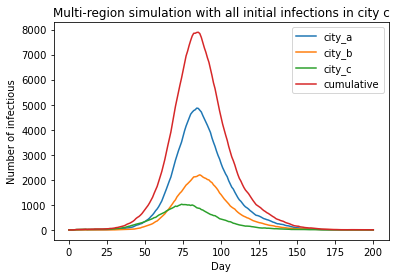

In [5]:
# Plotting. 
rnames = sim.rnames
rsizes = sim.rsizes

x_axis = np.arange(0, i_sim.t+1)

for rname in rnames:
    plt.plot(x_axis, i_sim.results[f"{rname}_n_infectious"])
    
plt.plot(x_axis, i_sim.results["n_infectious"]) # cumulative
    
plt.xlabel("Day")
plt.ylabel("Number of infectious")
plt.title("Multi-region simulation with all initial infections in city c")
plt.legend(rnames + ["cumulative"])
# plt.show()
fig_path = "/home/andrew/dev/wble_proj/behaviour_module/analysis/2wksum_0701/"
fname = "mr_sim_2.png"
plt.savefig(fig_path+fname, dpi=150)

#### Superspreading behaviour ####

"""
Single-region. 
First, init two populations with superspreading enabled/disabled in com
Plot their distributions of contacts. (Code already written)
    - Histogram.
Then run two sims which use the different pops. 
"""

In [42]:
import numpy as np
import behaviour as bh
import covasim as cv
import matplotlib.pyplot as plt

pars = dict(n=20000, rand_seed=1)
pars_ss = dict(n=20000, rand_seed=1, com_dispersion=0.2)

pop = bh.BehaviourModel(pars)
pop_ss = bh.BehaviourModel(pars_ss)

# Extract list of community contacts for each sim. 


BEHAVIOUR_MODULE
BEHAVIOUR_MODULE


In [43]:
# Extract list of community contact numbers. 
num_contacts = []
num_contacts_ss = []
for uid, person in pop.popdict.items():
    num_contacts.append(len(person['contacts']['C']))

for uid, person in pop_ss.popdict.items():
    num_contacts_ss.append(len(person['contacts']['C']))

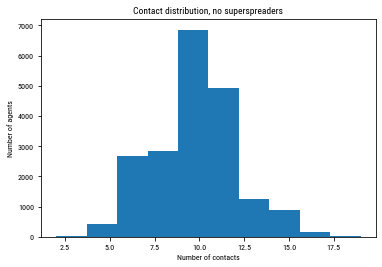

In [44]:
plt.hist(num_contacts, bins=10)
plt.xlabel("Number of contacts")
plt.ylabel("Number of agents")
plt.title("Contact distribution, no superspreaders")
# plt.show()
fig_path = "/home/andrew/dev/wble_proj/behaviour_module/analysis/2wksum_0701/"
fname = "hist.png"
plt.savefig(fig_path+fname, dpi=150)

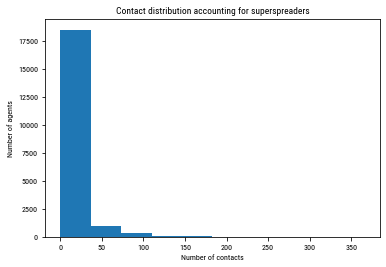

In [45]:
plt.hist(num_contacts_ss, bins=10)
plt.xlabel("Number of contacts")
plt.ylabel("Number of agents")
plt.title("Contact distribution accounting for superspreaders")
fig_path = "/home/andrew/dev/wble_proj/behaviour_module/analysis/2wksum_0701/"
fname = "hist_2.png"
plt.savefig(fig_path+fname, dpi=150)

In [13]:
print("Mean # contacts is: {}".format(np.mean(num_contacts_ss)))

Mean # contacts is: 9.59235


In [17]:
# Simulations.
pop_size = 20000
pop_type = 'behaviour_module'
n_days = 200

pars = dict(
    pop_size = pop_size,
    pop_type = pop_type, 
    n_days = n_days,
    rand_seed = 1)

sim = cv.Sim(pars=pars, people=pop.popdict)
sim.run(verbose=False)

sim_ss = cv.Sim(pars=pars, people=pop_ss.popdict)
sim_ss.run(verbose=False)

Initializing sim with 20000 people for 200 days
Initializing sim with 20000 people for 200 days


Sim(<no label>; 2020-03-01 to 2020-09-17; pop: 20000 behaviour_module; epi: 17360⚙, 69☠)

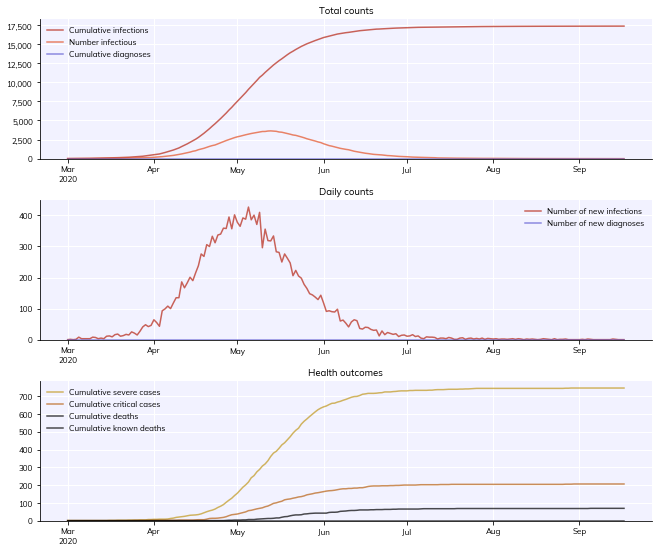

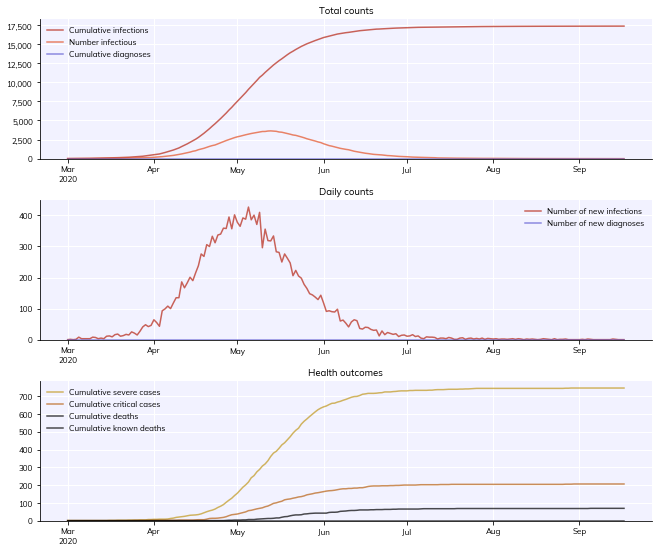

In [47]:
fig_path = "/home/andrew/dev/wble_proj/behaviour_module/analysis/2wksum_0701/"
fname = "res.png"
sim_ss.plot(do_save=True,fig_path=fig_path+fname)

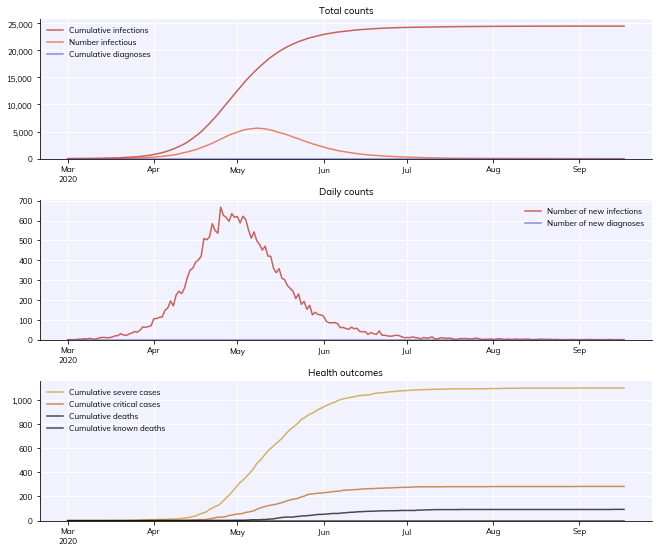

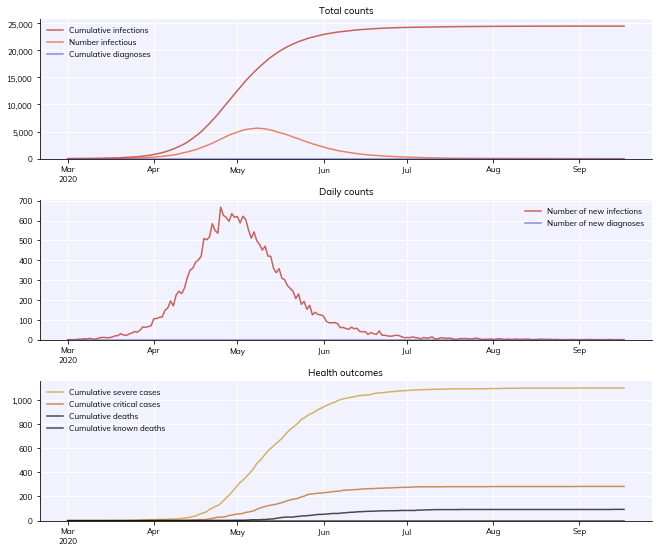

In [48]:
fig_path = "/home/andrew/dev/wble_proj/behaviour_module/analysis/2wksum_0701/"
fname = "res_noss.png"
sim.plot(do_save=True,fig_path=fig_path+fname)